<a href="https://colab.research.google.com/github/marinacer/EA616.P2/blob/master/glass.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>



1.   aplicar scaling para todos exceto random forest 

2.   explicar o método minmaxscaler que é um scaler robusto a outliners
3.   algoritmos variados: svm é linear, knn não paramemtrico
random forest não linear, ensemble
4. oversampling para compensar o desbalanceamento das classes
5. matriz de confusão para os melhores hiperparamentos de cada método


In [94]:
import csv
import numpy as np
import pandas as pd
import seaborn as sns
import sklearn.metrics as sk
import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn.metrics import f1_score
from sklearn.model_selection import KFold
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier

from sklearn.svm import SVC
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler

In [95]:
# open the csv file to dataframe
df = pd.read_csv('glass.csv')
df.head()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.0,0.0,1
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.0,1
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.0,1
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.0,0.0,1
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.0,0.0,1


In [99]:
df3=df[df['Type']==3]

df3=pd.concat([df3]*4)

df5=df[df['Type']==5]

df5=pd.concat([df5]*5)

df6=df[df['Type']==6]

df6=pd.concat([df6]*7)

df7=df[df['Type']==7]

df7=pd.concat([df7]*2)

df1=df[df['Type']==1]

df2=df[df['Type']==2]

df_balanced=pd.concat([df1,df2,df3,df5,df6,df7])



In [ ]:
# atributes to X and labels to y
X = df.drop('Type',axis = 1)
y = df.Type
df.head()

In [96]:
# label encoding. necessário para corrigir um erro do dataset na nomenclatura das classes
label = preprocessing.LabelEncoder()
label.fit(y)
y_label = label.transform(y)

In [103]:
Xtrain, Xtest = train_test_split(X, test_size = 0.30, stratify = y)

In [98]:
# processo de scaling do X que é um método robusto, bom para outliers
from sklearn.preprocessing import RobustScaler,MinMaxScaler
scale = RobustScaler()

Xtrain_scaled = scale.fit_transform(Xtrain)
Xtest_scaled = scale.transform(Xtest)

In [100]:
X_over = df_balanced.drop('Type',axis = 1)
y_over = df_balanced.Type
df_balanced.head()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.0,0.0,1
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.0,1
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.0,1
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.0,0.0,1
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.0,0.0,1


In [62]:
# dataframe to np.array, necessário para realizar as operações de cross over
#Xtrain = Xtrain.values
#Xtest = Xtest.values

**Oversampling**

In [18]:
from imblearn.over_sampling import SMOTE,RandomOverSampler
oversample = RandomOverSampler(sampling_strategy='not majority')
Xtrain_over, ytrain_over = oversample.fit_resample(Xtrain, ytrain)
Xtrain_over_scaled, ytrain_over_scaled = oversample.fit_resample(Xtrain, ytrain)

[70 76 68 65 63 58]
[53 53 53 53 53 53]


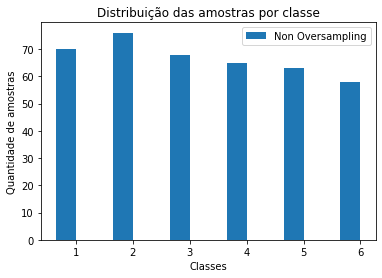

In [56]:
unique, counts = np.unique(y_label, return_counts=True)
unique, counts_over = np.unique(ytrain_over, return_counts=True)
print(counts)
print(counts_over)


labels = ['1', '2', '3', '4', '5', '6']
x = np.arange(len(labels))  # the label locations
width = 0.35  # the width of the bars

fig, ax = plt.subplots()
rects1 = ax.bar(x - width/2, counts, width, label='Non Oversampling')
#rects2 = ax.bar(x + width/2, counts_over, width, label='Oversampling')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Quantidade de amostras')
ax.set_xlabel('Classes')
ax.set_title('Distribuição das amostras por classe')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()

In [34]:
# cross validation, evaluation e desempenho do Random Forest
# por meio da variação de max_depth
def fit_random_forest(var,Xtrain_p, ytrain_p, Xtest_p,ytest_p):
  n_splits_kfold = 4
  kf = KFold(n_splits = n_splits_kfold)
  acc_vec = np.zeros(var)

  for j in range(0,var):
    acc = 0
    for train_index, test_index in kf.split(Xtrain_p):
      Xtrain_kfold, Xtest_kfold = Xtrain_p[train_index], Xtrain_p[test_index]
      ytrain_kfold, ytest_kfold = ytrain_p[train_index], ytrain_p[test_index]
      
      clf = RandomForestClassifier(max_depth = j+1, n_estimators = 500)
      clf.fit(Xtrain_kfold, ytrain_kfold)
      ypred_kfold = clf.predict(Xtest_kfold)
      acc += f1_score(ytest_kfold, ypred_kfold, average='macro')
      
    acc_vec[j] = acc/n_splits_kfold
  plt.plot(acc_vec)
  best_var = acc_vec.argmax() + 1

  # execução Random Forest com o hiperparâmetro max_depth ideal
  clf = RandomForestClassifier(max_depth=best_var, n_estimators = 100)
  clf.fit(Xtrain_p, ytrain_p)
  y_predict = clf.predict(Xtest_p)
  f1_predict = f1_score(ytest_p, y_predict, average='macro')
  acc_predict = accuracy_score(ytest_p,y_predict)

  cmatrix = sk.confusion_matrix(ytest_p,y_predict)
  plt.figure(figsize=(5,5))
  sns.heatmap(cmatrix, annot=True, fmt=".0f", linewidths=.5, square = True, cmap = 'Blues');
  plt.ylabel('Actual label');
  plt.xlabel('Predicted label');
  all_sample_title = 'Accuracy Score: {:.4f}'.format(accuracy_score(ytest_p,y_predict))
  plt.title(all_sample_title, size = 15)

  return(best_var,f1_predict,acc_predict)

(13, 0.9121286121286122, 0.9083333333333333)

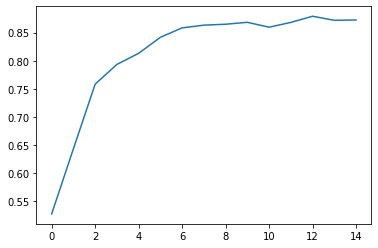

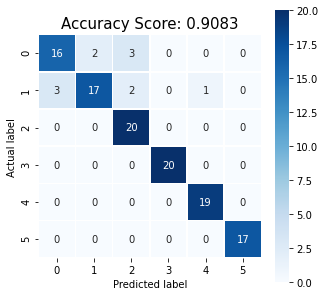

In [35]:
# sem pré processamentos
fit_random_forest(15,Xtrain,ytrain,Xtest,ytest)

(12, 0.9678200772022283, 0.9666666666666667)

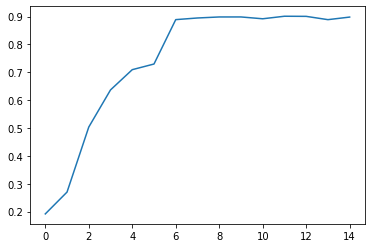

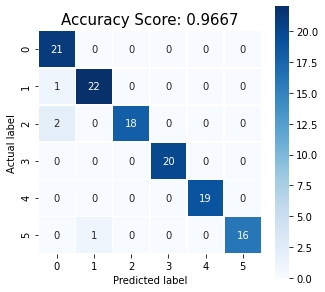

In [36]:
# com oversampling
fit_random_forest(15,Xtrain_over,ytrain_over,Xtest,ytest)

(15, 0.9203736642761032, 0.9166666666666666)

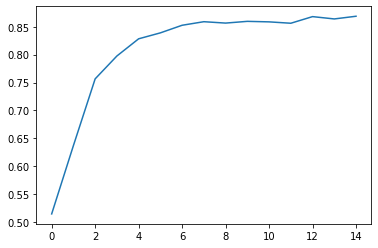

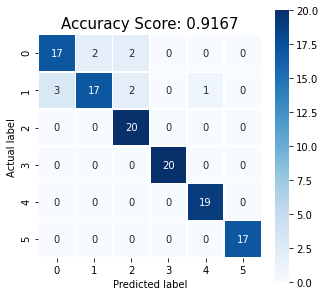

In [37]:
# com scaling
fit_random_forest(15,Xtrain_scaled,ytrain,Xtest_scaled,ytest)

(8, 0.20893888263967006, 0.2916666666666667)

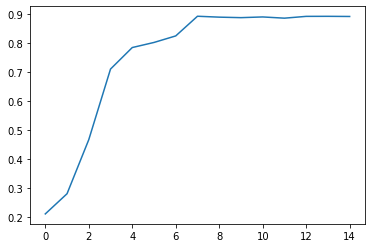

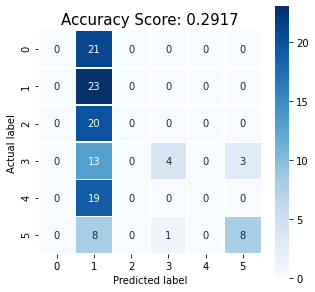

In [38]:
# com oversampling e scaling
fit_random_forest(15,Xtrain_over_scaled,ytrain_over_scaled,Xtest_scaled,ytest)

In [77]:
# cross validation, evaluation e desempenho do KNN
# por meio da variação do nº de vizinhos
def fit_knn(var,Xtrain_p, ytrain_p, Xtest_p,ytest_p):
  n_splits_kfold = 4
  kf = KFold(n_splits = n_splits_kfold)
  acc_vec = np.zeros(var)
  
  for j in range(0,var):
    acc = 0
    for train_index, test_index in kf.split(Xtrain_p):
      Xtrain_kfold, Xtest_kfold = Xtrain_p[train_index], Xtrain_p[test_index]
      ytrain_kfold, ytest_kfold = ytrain_p[train_index], ytrain_p[test_index]
      
      neigh = KNeighborsClassifier(n_neighbors = j+1)
      neigh.fit(Xtrain_kfold, ytrain_kfold)
      ypred_kfold = neigh.predict(Xtest_kfold)
      acc += f1_score(ytest_kfold, ypred_kfold, average='macro')
      
    acc_vec[j] = acc/n_splits_kfold
  plt.plot(acc_vec)
  best_var = acc_vec.argmax() + 1

  # execução KNN com o hiperparâmetro n_neighbors ideal
  neigh = KNeighborsClassifier(n_neighbors = best_var)
  neigh.fit(Xtrain_p, ytrain_p)
  y_predict = neigh.predict(Xtest_p)
  f1_predict = f1_score(ytest_p, y_predict, average='macro')
  acc_predict = accuracy_score(ytest_p,y_predict)

  cmatrix = sk.confusion_matrix(ytest_p,y_predict)
  plt.figure(figsize=(5,5))
  sns.heatmap(cmatrix, annot=True, fmt=".0f", linewidths=.5, square = True, cmap = 'Blues');
  plt.ylabel('Actual label');
  plt.xlabel('Predicted label');
  all_sample_title = 'Accuracy Score: {:.4f}'.format(accuracy_score(ytest_p,y_predict))
  plt.title(all_sample_title, size = 15)

  return(best_var,f1_predict,acc_predict)

(1, 0.6392487348449744, 0.6461538461538462)

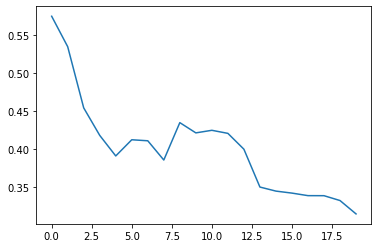

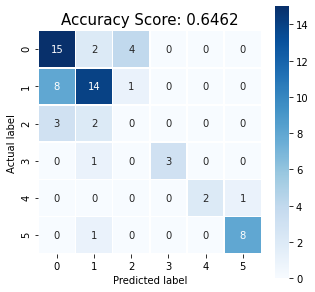

In [78]:
# com scaling
fit_knn(20,Xtrain_scaled,ytrain,Xtest_scaled,ytest)

(1, 0.047619047619047616, 0.16666666666666666)

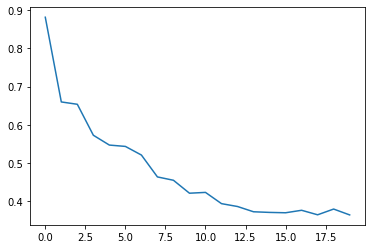

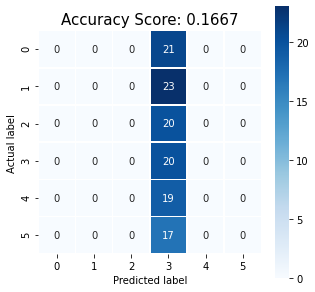

In [65]:
# com oversampling e scaling
fit_knn(20,Xtrain_over_scaled,ytrain_over_scaled,Xtest_scaled,ytest)

In [24]:
# cross validation, evaluation e desempenho do SVC
# por meio da variação do C
def fit_svc(var,Xtrain_p, ytrain_p, Xtest_p,ytest_p):
  n_splits_kfold = 4
  kf = KFold(n_splits = n_splits_kfold)
  acc_vec = np.zeros(len(var))
  
  for i,j in enumerate(var):
    acc = 0
    for train_index, test_index in kf.split(Xtrain_p):

      Xtrain_kfold, Xtest_kfold = Xtrain_p[train_index], Xtrain_p[test_index]
      ytrain_kfold, ytest_kfold = ytrain_p[train_index], ytrain_p[test_index]
      

      reg = SVC(gamma='auto',kernel='linear',C=j)
      reg.fit(Xtrain_kfold,ytrain_kfold)
      ypred_kfold = reg.predict(Xtest_kfold)
      acc += f1_score(ytest_kfold, ypred_kfold, average='macro')
      
      
    acc_vec[i] = acc/n_splits_kfold
  plt.plot(acc_vec)
  best_var = var[acc_vec.argmax()]

  # execução SVC com o hiperparâmetro C ideal
  reg = SVC(gamma='auto',kernel='linear',C=best_var)
  reg.fit(Xtrain_p,ytrain_p)
  y_predict = reg.predict(Xtest_p)
  f1_predict = f1_score(ytest_p, y_predict, average='macro')
  acc_predict = accuracy_score(ytest_p,y_predict)
  
  cmatrix = sk.confusion_matrix(ytest_p,y_predict)
  plt.figure(figsize=(5,5))
  sns.heatmap(cmatrix, annot=True, fmt=".0f", linewidths=.5, square = True, cmap = 'Blues');
  plt.ylabel('Actual label');
  plt.xlabel('Predicted label');
  all_sample_title = 'Accuracy Score: {:.4f}'.format(accuracy_score(ytest_p,y_predict))
  plt.title(all_sample_title, size = 15)

  return(best_var,f1_predict,acc_predict)

In [19]:
vec_reg = [1e-1,1e+0,1e+1,1e+2,1e+3,1e+4,1e+5,1e+6,1e+7]

(1000.0, 0.596927771927772, 0.5692307692307692)

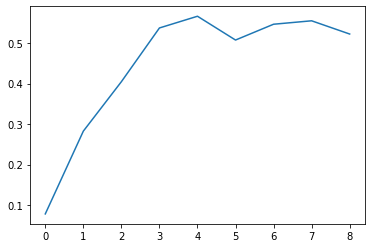

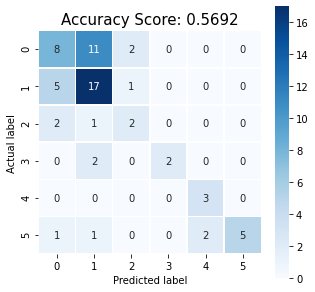

In [20]:
# com scaling
fit_svc(vec_reg,Xtrain_scaled,ytrain,Xtest_scaled,ytest)

In [ ]:
# com oversampling e scaling
fit_svc(vec_reg,Xtrain_over_scaled,ytrain_over_scaled,Xtest_scaled,ytest)

**Gráficos e Visualizações**

In [ ]:
# correlation matrix
corrMatrix = X.corr()
fig, ax = plt.subplots(figsize=(20,10))
sns.heatmap(corrMatrix, annot=True, ax=ax,cmap="YlGnBu", center = 0)
plt.show()

In [ ]:
# histograma com scaling
Xtrainpd = pd.DataFrame(Xtrain_scaled)
fig, ax = plt.subplots(figsize=(30,20)) 
Xtrainpd.hist(ax = ax)
pass

In [ ]:
sns.FacetGrid(df,hue="Type",height=5).map(sns.distplot,"RI").add_legend();

**Regressão Logística**
descartada por não convergir

In [ ]:
def fit_reg(var,Xtrain_p, ytrain_p, Xtest_p,ytest_p):
  n_splits_kfold = 4
  kf = KFold(n_splits = n_splits_kfold)
  acc_vec = np.zeros(len(var))
  
  for i,j in enumerate(var):
    acc = 0
    for train_index, test_index in kf.split(Xtrain_p):

      Xtrain_kfold, Xtest_kfold = Xtrain_p[train_index], Xtrain_p[test_index]
      ytrain_kfold, ytest_kfold = ytrain_p[train_index], ytrain_p[test_index]
      
      reg = LogisticRegression(fit_intercept=True,multi_class='multinomial', C=j,max_iter=500)
      reg.fit(Xtrain_kfold,ytrain_kfold)
      ypred_kfold = reg.predict(Xtest_kfold)
      acc += f1_score(ytest_kfold, ypred_kfold, average='macro')
      
      
    acc_vec[i] = acc/n_splits_kfold
  plt.plot(acc_vec)
  best_var = var[acc_vec.argmax()]

  # método com o hiperparâmetro ideal
  reg = LogisticRegression(fit_intercept=True,multi_class='multinomial', C=best_var,max_iter=500)
  reg.fit(Xtrain_p,ytrain_p)
  y_predict = reg.predict(Xtest_p)
  f1_predict = f1_score(ytest_p, y_predict, average='macro')
  acc_predict = accuracy_score(ytest_p,y_predict)

  cmatrix = sk.confusion_matrix(ytest_p,y_predict)
  plt.figure(figsize=(5,5))
  sns.heatmap(cmatrix_ran, annot=True, fmt=".0f", linewidths=.5, square = True, cmap = 'Blues');
  plt.ylabel('Actual label');
  plt.xlabel('Predicted label');
  all_sample_title = 'Accuracy Score: {:.4f}'.format(accuracy_score(ytest_p,y_predict))
  plt.title(all_sample_title, size = 15)

  return(best_var,f1_predict,acc_predict)

fit_reg(vec_reg,Xtrain_scaled,ytrain,Xtest_scaled,ytest)